In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
flights = pd.read_csv('data/flights_dirty.csv')

In [5]:
# Check the top of DataFrame
flights.head()

,year,month,passengers
0,1949,jan,114.388770
1,1949,Feb,116.704857
2,1949,Mar,129.126454
3,1949,Apr,126.892509
4,1949,May,122.699105


In [6]:
# Check the bottom of DataFrame
flights.tail()

,year,month,passengers
149,1955,Feb,224.654338
150,1950,Jul,166.140905
151,1958,Oct,367.306509
152,1955,Jul,362.328765
153,1955,May,268.410765


> The `passengers` column is `float` instead of an `int` data type
>
> Inconsistency in the string format in the `month` column

In [8]:
# Check the summary information
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        154 non-null    object 
 1   month       154 non-null    object 
 2   passengers  136 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.7+ KB


In [9]:
# Check the descriptive statistics
flights.describe()

,passengers
count,136.000000
mean,299.633655
std,171.510392
min,-15.748963
25%,189.203060
50%,275.432094
75%,366.067432
max,1503.245434


In [10]:
flights.describe(include='O')

,year,month
count,154,154
unique,13,32
top,1955,Feb
freq,16,14


> There is the possibilities of an outliter with a maximum of 1503

> There is a negative value (-15) in passengers which is bad data

> from the dataset information available there should be 12 uniques years (1949- 1960). This shows 13

In [12]:
# investigate the year column
flights['year'].unique()

array(['1949', 'unknown', '1950', '1951', '1952', '1953', '1954', '1955',
       '1956', '1957', '1958', '1959', '1960'], dtype=object)

> There is a 'unknown' value for year

In [14]:
 # confirm missing values
flights.isna().sum(0)

year           0
month          0
passengers    18
dtype: int64

In [15]:
# check the percentage of missing values
flights.isna().sum() / len(flights) * 100

year           0.000000
month          0.000000
passengers    11.688312
dtype: float64

<Axes: >

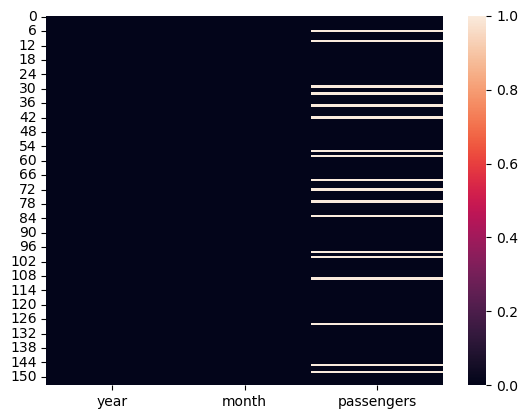

In [21]:
# Visualize the missing value
sns.heatmap(flights.isna())

In [16]:
# check for duplicates values
flights.duplicated(['year', 'month'])

0      False
1      False
2      False
3      False
4      False
       ...  
149     True
150     True
151     True
152     True
153     True
Length: 154, dtype: bool

In [17]:
# How many duplictates?
flights.duplicated(['year', 'month']).sum() # rmember True = 1

np.int64(6)

In [18]:
flights.duplicated(['year', 'month']).value_counts()

False    148
True       6
Name: count, dtype: int64

> Outcome: Duplicates detected, requires us to remove.

In [19]:
# check the values of month column
flights['month'].value_counts()

month
Feb     14
Aug     12
Jul     12
May     11
Dec     11
Sep     11
Jan     10
Nov     10
Oct      9
Apr      9
Jun      9
Mar      9
mar      3
OCT      3
NOV      2
oct      2
apr      2
nov      1
Apr      1
jan      1
aug      1
MAY      1
JUN      1
MAY      1
jul      1
Jan      1
dec      1
sep      1
Jul      1
jun      1
Sep      1
Jun      1
Name: count, dtype: int64

In [ ]:
# Use groupby to see the mean, count median
flights.groupby('month').agg(['mean', 'count', 'median'])

In [20]:
flights.groupby('month')['passengers'].agg(['mean', 'count', 'median'])

,mean,count,median
month,,,
Apr,255.058381,9,239.237007
Apr,126.892509,1,126.892509
Aug,368.199646,11,339.967974
Dec,261.386275,11,233.393368
Feb,237.072422,12,228.228183
JUN,268.702678,1,268.702678
Jan,391.008909,10,301.180138
Jan,NaN,0,NaN
Jul,367.283194,10,363.398796


In [ ]:
> Inconsistent month labels needs to be corrected using - string manipulation 